In [4]:
%%time
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib
Wall time: 29 ms


# Загрузим данные такис Нью-йорка

In [5]:
#path3 = r'C:\Users\DenAS\Downloads\11AA\Source\1.3\NYC' + '//'
FName3 = 'train.csv'
full_patch3 = FName3
full_patch3

'train.csv'

In [44]:
%%time
df = pd.read_csv(full_patch3) #, dtype={'pickup_datetime': float64,'dropoff_datetime': float64})
print(df.shape)

(1458644, 11)
Wall time: 6.48 s


Переведём колонки pickup_datetime,  dropoff_datetime в формат дата-время и вычислим время поездки, как дату-время

In [45]:
%%time
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df['trip_time'] = df.dropoff_datetime - df.pickup_datetime

Wall time: 1.5 s


In [46]:
#df.info()

Определим час начала поездки:

In [47]:
def t_interval(row):
    return row['pickup_datetime'].hour

In [48]:
%%time
df['Hour'] = df.apply( t_interval, axis = 1 )

Wall time: 2min 49s


Добавим колонку "Количество поездок"

In [49]:
%%time
df['Trip_cunt'] = 1

Wall time: 17 ms


Удалим колонки географически координат начала и конца поездки:

In [50]:
df = df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)
#data.drop('weight_pounds',axis=1)
#df.info()

In [51]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,trip_time,Hour,Trip_cunt
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,N,455,00:07:35,17,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,N,663,00:11:03,0,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,N,2124,00:35:24,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,N,429,00:07:09,19,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,N,435,00:07:15,13,1


In [52]:
#df.describe()

Узнаем в какие часы совершается польше поездок - построим гистограмму по часам

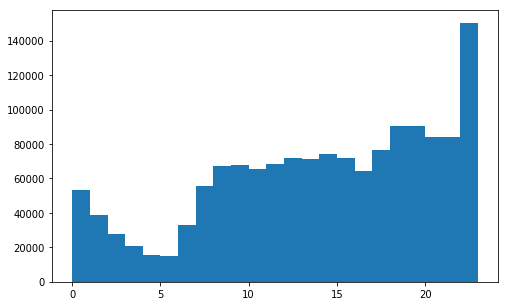

In [64]:
plt.hist( df['Hour'], bins = 23)
plt.show()

Узнаем в какое время пассажиры ездят по одиночке, а в какое группами - построим распределение по часам переменных passenger_count и Trip_cunt

In [65]:
df1 = df[['passenger_count','Trip_cunt'] + ['Hour']]\
    .groupby('Hour').sum()

In [66]:
#df1.passenger_count = df1.passenger_count/df1.passenger_count.mean()
#df1.Trip_cunt = df1.Trip_cunt/df1.Trip_cunt.mean()
df1.style.bar()

,passenger_count,Trip_cunt
Hour,,
0,90041,53248
1,65933,38571
2,47685,27972
3,35644,20895
4,26914,15792
5,23661,15002
6,51101,33248
7,87607,55600
8,107867,67053


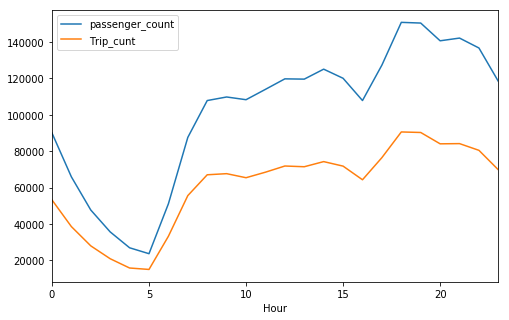

In [62]:
df1.plot();

Узнаем распределение количества пассажиров в одной поездке и продолжительности поездок

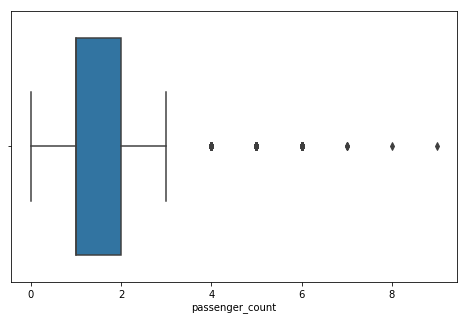

In [93]:
sns.boxplot(data=df, x = 'passenger_count')

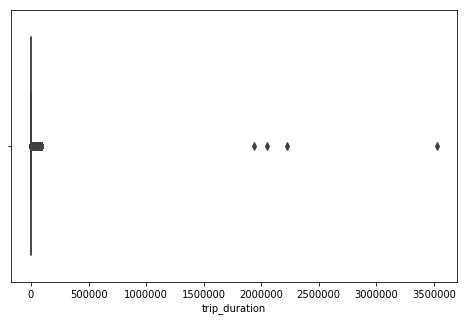

In [94]:
sns.boxplot(data=df, x = 'trip_duration')

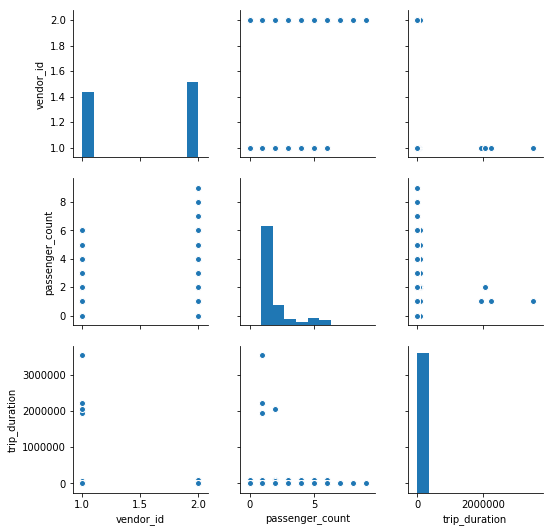

In [95]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df[['vendor_id', 'passenger_count', 'trip_duration']]);
sns_plot.savefig('pairplot.png')

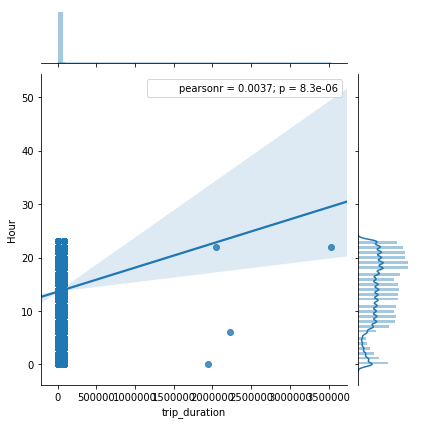

In [96]:
sns.jointplot(x='trip_duration', y='Hour', 
              data=df, kind='reg');

In [97]:
df3 = df.groupby('Hour')[['id']].count()
df3['passenger_count'] = df.groupby('Hour')[['passenger_count']].sum()
df3.head()

,id,passenger_count
Hour,,
0,53248,90041
1,38571,65933
2,27972,47685
3,20895,35644
4,15792,26914


In [98]:
df3.reset_index()

,Hour,id,passenger_count
0,0,53248,90041
1,1,38571,65933
2,2,27972,47685
3,3,20895,35644
4,4,15792,26914
5,5,15002,23661
6,6,33248,51101
7,7,55600,87607
8,8,67053,107867
9,9,67663,109825


In [99]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [100]:
trace0 = go.Scatter(
    x=df3.index,
    y=df3.id,
    name='Trip count'
)

trace1 = go.Scatter(
    x=df3.index,
    y=df3.passenger_count,
    name='Passenger count'
)

data = [trace0, trace1]
layout = {'title': ' The ratio of the number of trips to the number of passengers'}

fig = go.Figure(data=data, layout=layout)

iplot(fig) #, show_link=False)